Importes that you might need are given below

# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23928\1957008439.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


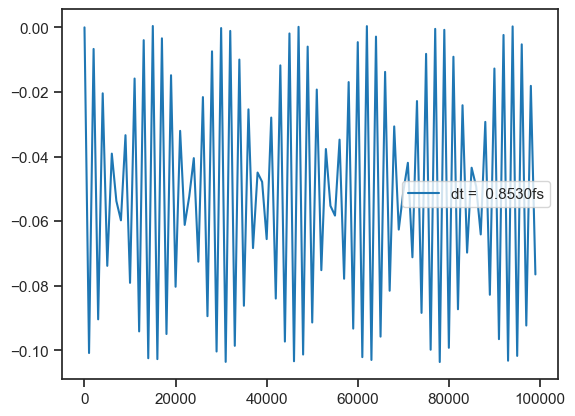

In [8]:

#for i in range (5): 
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
y = (df["E"].values - df["E"].values[0])/df["E"].values *100
plt.plot(x,y,label ='dt =  '+str(8.530612244897958E-16*1E15)[:6] + "fs" )
plt.legend()


In [22]:
mass = 6.6E-26
omega = 7.56E13
(5/1E10*omega)**2*0.5*mass #חישבנו מראש את האנרגיה הכוללת, ויצא קרוב לתוצאות




4.715172e-17

# The Harmonic Oscillator

Start with one dimensional harmonic trap: $V=\frac{1}{2}m\omega^2 x^2$

**Simulation details:**

Number of particles: 1.

Initial position: x = 5 Angstrom.

Initial momenta: Zero.

Nsteps = 10000.

trap frequency, $\hbar\omega = 50 meV$

**Questions \& Figures**


1. Figure 1: Plot the change in the total energy with respect to t=0 (in precent) vs. time for different values of dt.
What is the largest dt you can use so that the energy is conserved better than 0.1% of its initial value?
1. Figure 2: Plot the position of the particle vs. time. Explain the observed dynamics.
1. Figure 3: Plot the potential and kinteic energies vs. time.
1. Figure 4: Plot the histogram of the position of the particle.
1. Figure 5: Plot the histogram of the momenta of the particle.
Explain the shape of the histograms in Figures 4-5. How do you excpect them to change in the canonical ensemble?


## figure 1

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_24140\4014309119.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')


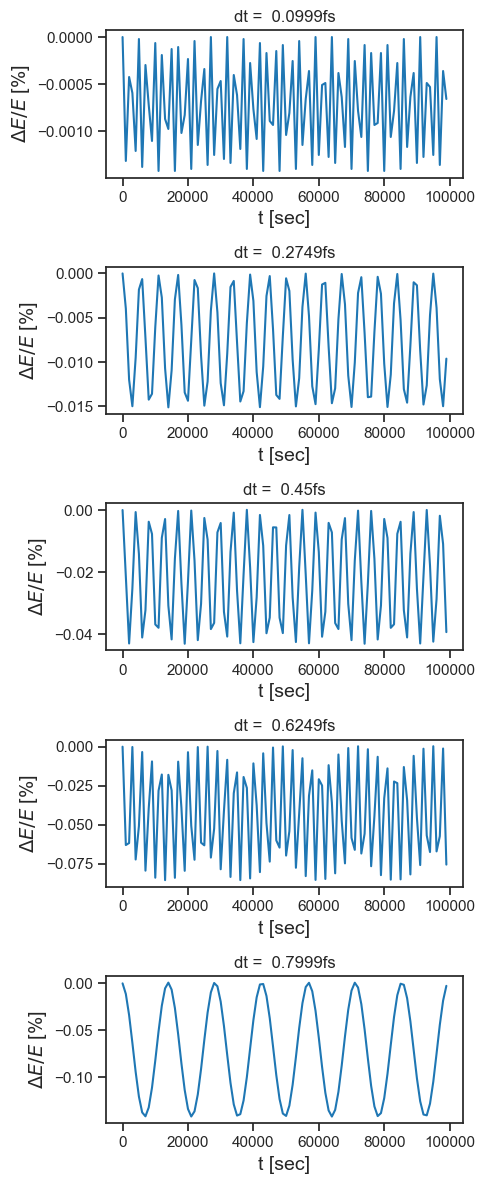

In [5]:
# just an example, you can do somthing else
fig, ax = plt.subplots(5,1,figsize=(5,12))
for i,dt in enumerate(np.linspace(0.1E-15, 0.8E-15, 5)):

    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    x = df["step"].values
    y = (df["E"].values - df["E"].values[0])/df["E"].values[0] *100
    ax[i].plot(x,y,label=str(i))
    # plt.legend()
    
    ax[i].set_title('dt =  '+str(dt*1E15)[:6] + "fs")
    ax[i].set_xlabel('t [sec]')
    ax[i].set_ylabel(r'$\Delta E/E$ [%]')
plt.tight_layout()


## figure 2


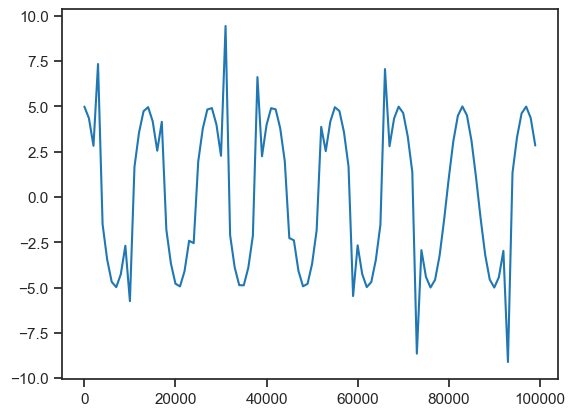

In [3]:
df = open("sim.xyz", 'r')

x = []
y = []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        x.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        y.append(float(tmp[1][:6]))
    i+=1
plt.plot(x,y)

df.close()

## figure 3


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_21132\594840476.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


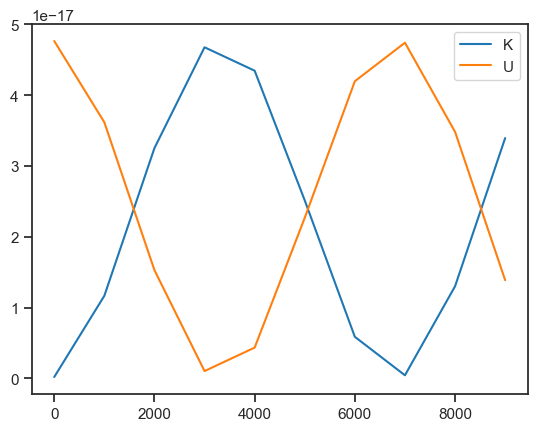

In [3]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
plt.plot(x[:10],df["K"].values[:10],label ="K")
plt.plot(x[:10],df["U"].values[:10],label ="U")
plt.legend()